In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync import *
from sklearn.linear_model import LinearRegression


In [2]:
util.startLoop()

In [3]:
# Conectar con Interactive Brokers
ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)

<IB connected to 127.0.0.1:7497 clientId=1>

In [4]:
# Definir contrato de la acción COIN
contract = Stock('COIN', 'SMART', 'USD')

In [5]:
# Obtener datos históricos
bars = ib.reqHistoricalData(
    contract,
    endDateTime='',
    durationStr='20 D',
    barSizeSetting='1 day',
    whatToShow='TRADES',
    useRTH=True,
    formatDate=1
)

In [6]:
# Convertir a DataFrame
df = pd.DataFrame(bars)
df['Fecha'] = pd.to_datetime(df['date'])
df['Precio'] = df['close']

In [7]:
# Definir punto máximo y mínimo
max_price = df['Precio'].max()
min_price = df['Precio'].min()
diff = max_price - min_price


In [8]:
# Niveles de Fibonacci (retrocesos más comunes)
fibonacci_levels = [0.236, 0.382, 0.5, 0.618, 0.786]
fib_lines = [max_price - diff * level for level in fibonacci_levels]

In [9]:
# Preparar datos para AI (usando regresión lineal para predicción de tendencia)
df['Dias'] = np.arange(len(df))
X = df[['Dias']]
y = df['Precio']
model = LinearRegression()
model.fit(X, y)
df['Prediccion'] = model.predict(X)

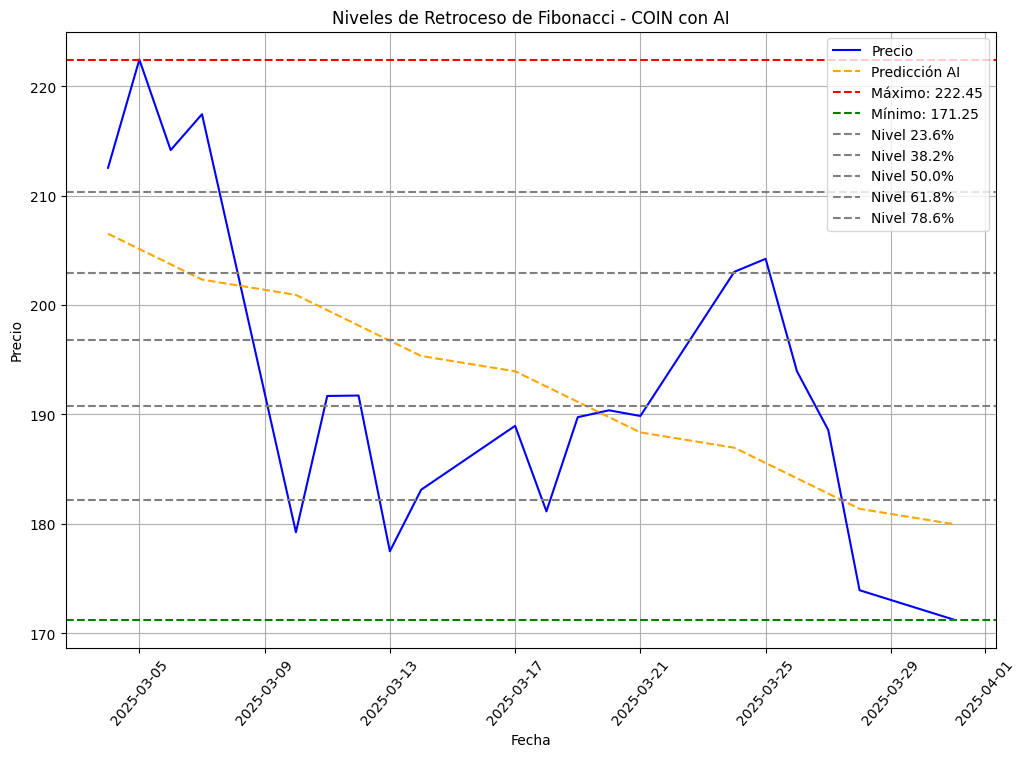

In [12]:
# Graficar
plt.figure(figsize=(12, 8))
plt.plot(df['Fecha'], df['Precio'], label='Precio', color='blue')
plt.plot(df['Fecha'], df['Prediccion'], label='Predicción AI', linestyle='dashed', color='orange')
plt.axhline(y=max_price, linestyle='--', color='red', label=f'Máximo: {max_price}')
plt.axhline(y=min_price, linestyle='--', color='green', label=f'Mínimo: {min_price}')
plt.xticks(rotation = 50)

# Dibujar líneas de Fibonacci
for level, line in zip(fibonacci_levels, fib_lines):
    plt.axhline(y=line, linestyle='--', color='gray', label=f'Nivel {level*100:.1f}%')

plt.legend()
plt.title('Niveles de Retroceso de Fibonacci - COIN con AI')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid()
plt.show()

In [13]:
ib.disconnect()